## __Homework_4__

# Проводится исследование, раскрывающее характер и особенности задержек авиарейсов в аэропортах Нью-Йорка за 2013г

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'

flights = pd.read_csv(url1)

In [16]:
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'

weather = pd.read_csv(url2)

In [17]:
flights.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

Все факторы, в связи с которыми возникают задержки авиарейсов в аэропортах Нью-Йорка, можно условно поделить на те, которые связаны с конкретным аэропортом (расположение аэропорта, рабочий персонал и т.д.), и те, которые влияют на все аэропорты в городе (из наших данных - это погодные условия и, возможно, авиаперевозчики). Поэтому целесообразно при поиске характерных зависимостей от погоды опираться на данные 3х аэропортов одновременно, а при поиске других факторов изучать данные каждого аэропорта в отдельности.

In [30]:
jfk = flights[flights['origin'] == 'JFK']
lga = flights[flights['origin'] == 'LGA']
ewr = flights[flights['origin'] == 'EWR']

In [53]:
flights_clear = flights.dropna()

Посмотрим на средние значения задержек в разные месяцы в году.

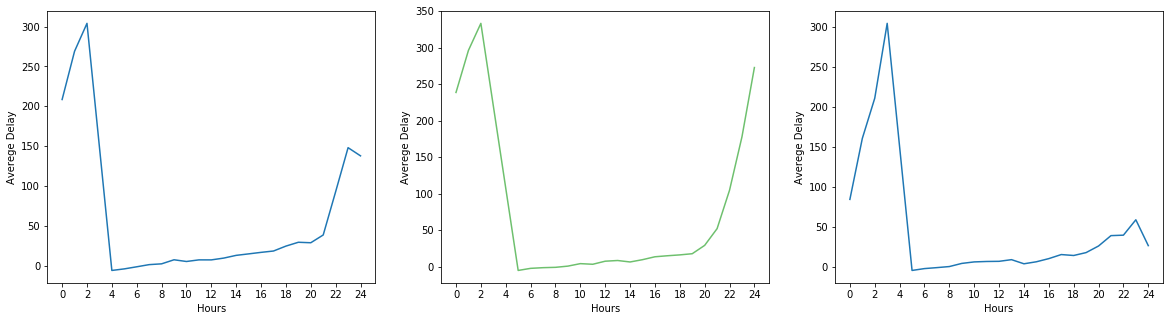

In [79]:
_, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.setp(ax, xticks=np.arange(0, 25, 2), xlabel='Hours',ylabel='Averege Delay')
 
ax[0].plot(np.sort(ewr['hour'][ewr['hour'].notna()].unique()), ewr.groupby(['hour'])['dep_delay'].mean())
ax[1].plot(np.sort(lga['hour'][lga['hour'].notna()].unique()), lga.groupby(['hour'])['dep_delay'].mean(), color = '#6EC06E')
ax[2].plot(np.sort(jfk['hour'][jfk['hour'].notna()].unique()), jfk.groupby(['hour'])['dep_delay'].mean())
plt.show()

Видно, что в интервале 2 a.m. - 4 a.m. задержки в аэропортах являются самыми большими. Причем далее идет очень резкое падение среднего значения задержек, и постепенно к вечеру средние значения задержек снова увеличиваются. 

Теперь давайте рассмотрим средние значения задержек в зависимости от месяца в году.

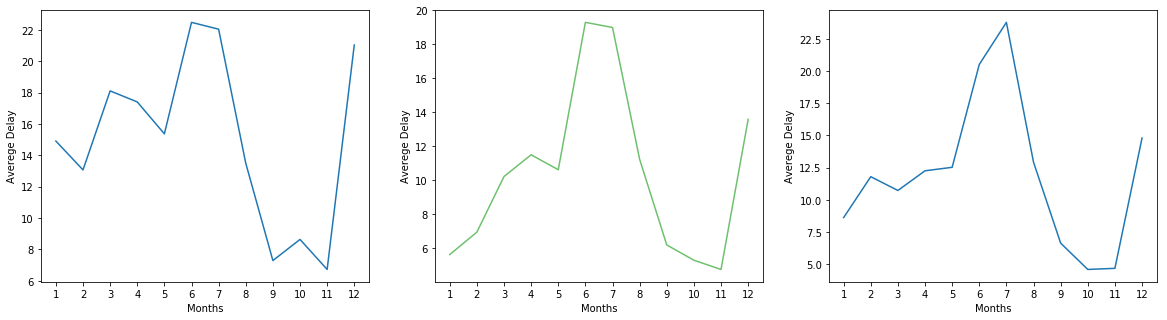

In [77]:
_, ax = plt.subplots(1, 3, figsize = (20, 5))
plt.setp(ax, xticks=np.arange(1,13), xlabel='Months',ylabel='Averege Delay')
 
ax[0].plot(np.sort(ewr['month'][ewr['month'].notna()].unique()), ewr.groupby(['month'])['dep_delay'].mean())
ax[1].plot(np.sort(lga['month'][lga['month'].notna()].unique()), lga.groupby(['month'])['dep_delay'].mean(), color = '#6EC06E')
ax[2].plot(np.sort(jfk['month'][jfk['month'].notna()].unique()), jfk.groupby(['month'])['dep_delay'].mean())
plt.show()

Мы видим, что наибольшие пики приходятся на середину лета и на предновогодний период. В это время возможно стоит больше внимания уделить этой проблеме, тк она наиболее актуальна.

In [102]:
full = pd.merge(weather.drop('origin', 1),flights, on = ['year', 'month', 'day', 'hour'])
ewr_full = full[full['origin'] == 'EWR']
lga_full = full[full['origin'] == 'LGA']
jfk_full = full[full['origin'] == 'JFK']

In [103]:
ewr_full.head(15)

,Unnamed: 0_x,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,...,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,minute
2,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,844.0,-6.0,B6,N644JB,343,EWR,PBI,147.0,1023,1.0
5,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,858.0,-12.0,AA,N633AA,1895,EWR,MIA,152.0,1085,6.0
7,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,858.0,-17.0,UA,N53442,1077,EWR,MIA,157.0,1085,7.0
8,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,807.0,32.0,MQ,N9EAMQ,3768,EWR,ORD,139.0,719,8.0
12,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,833.0,-9.0,DL,N326NB,575,EWR,ATL,120.0,746,15.0
13,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,1017.0,3.0,US,N807AW,245,EWR,PHX,342.0,2133,22.0
16,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,909.0,29.0,EV,N11107,4626,EWR,MSP,190.0,1008,24.0
20,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,1016.0,29.0,UA,N33289,1665,EWR,LAX,366.0,2454,28.0
23,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,824.0,-9.0,US,N426US,1019,EWR,CLT,91.0,529,29.0
24,6,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,...,740.0,12.0,EV,N13553,4144,EWR,IAD,52.0,212,32.0
